# WeatherPy
----

#### Note

* Temperatures are higher at latitudes closer to the equator and lower towards the North and South Pole.
* Highest Temperature is found around 20 degree latitude. 
* Temperature vs. Latitude r-squared value is at least .70 which makes the the correlation between temperature and latitude moderate to strong.
* Humidity, cloudiness, wind speed vs. Latitude had a very small r_squared value.  Thus, there is a very weak correlation between Humidity, cloudiness and wind speed along the latitude.
* There are some outliers in the data for cloudiness and wind speed.
  

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
import datetime
import os
import csv


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url
        
        

'http://api.openweathermap.org/data/2.5/weather?appid=8ef7960e4b4ab5cd6cc11c76b8226720&units=imperial&q='

In [60]:
#response = requests.get(query_url +'Port Hedland').json()
#pprint(response)

In [62]:
# set up lists to hold response info

record_count = 1
city_weather_data = []
print('Beginning Data Retrieval')
print('--------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name = response['name']
        city_country=response['sys']['country']
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_wind_speed = response['wind']['speed']
        city_date = response['dt']
        #city_date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Data dictionary of weather data
        city_weather_data.append({'City':city_name, 
                          'Country': city_country, 
                          'Latitude': city_lat, 
                          'Longitude': city_lon,
                          'Max Temperature': city_max_temp,
                          'Humidity': city_humidity, 
                          'Cloudiness': city_cloudiness, 
                          'Wind Speed': city_wind_speed,
                          'Date': city_date})
        
        
        print(f'Processing Record {record_count}| {city}')
        record_count+= 1
    except:
        print(f'City not found. Skipping...')
        


Beginning Data Retrieval
--------------------------
Processing Record 1| port blair
Processing Record 2| hobart
City not found. Skipping...
Processing Record 3| lebu
Processing Record 4| hermanus
Processing Record 5| atuona
Processing Record 6| dikson
Processing Record 7| barrow
Processing Record 8| kaitangata
Processing Record 9| vila franca do campo
Processing Record 10| qasigiannguit
Processing Record 11| khatanga
Processing Record 12| cidreira
Processing Record 13| santo antonio do ica
Processing Record 14| tasiilaq
Processing Record 15| naze
Processing Record 16| bredasdorp
Processing Record 17| ushuaia
Processing Record 18| keti bandar
Processing Record 19| port alfred
Processing Record 20| mataura
Processing Record 21| busselton
Processing Record 22| rikitea
Processing Record 23| rocha
Processing Record 24| tecoanapa
Processing Record 25| albany
Processing Record 26| upernavik
Processing Record 27| bambanglipuro
City not found. Skipping...
Processing Record 28| ponta do sol
City

Processing Record 236| vila velha
Processing Record 237| rio gallegos
Processing Record 238| brownsville
Processing Record 239| lalibela
Processing Record 240| esperance
Processing Record 241| arman
Processing Record 242| suoyarvi
Processing Record 243| oistins
Processing Record 244| inta
Processing Record 245| sabha
Processing Record 246| kampot
Processing Record 247| hambantota
Processing Record 248| bambous virieux
Processing Record 249| erenhot
Processing Record 250| chabahar
Processing Record 251| mayo
Processing Record 252| bustamante
Processing Record 253| calatagan
Processing Record 254| nizhniy baskunchak
Processing Record 255| dicabisagan
Processing Record 256| korla
Processing Record 257| pingzhuang
Processing Record 258| sumbe
Processing Record 259| san-pedro
Processing Record 260| danszentmiklos
Processing Record 261| neftcala
Processing Record 262| clyde river
Processing Record 263| port moresby
Processing Record 264| olinda
Processing Record 265| manokwari
Processing Rec

Processing Record 482| malumfashi
Processing Record 483| xingyi
Processing Record 484| killarney
Processing Record 485| bisho
Processing Record 486| bay roberts
Processing Record 487| kurilsk
Processing Record 488| karwar
Processing Record 489| saurimo
Processing Record 490| auki
Processing Record 491| tigil
Processing Record 492| kawalu
Processing Record 493| teguldet
Processing Record 494| yar-sale
Processing Record 495| curitibanos
Processing Record 496| bhag
Processing Record 497| toora-khem
Processing Record 498| steamboat springs
Processing Record 499| pitsunda
Processing Record 500| maracacume
Processing Record 501| shache
Processing Record 502| meadow lake
Processing Record 503| alagir
Processing Record 504| urgut
Processing Record 505| bubaque
Processing Record 506| pietarsaari
Processing Record 507| iskateley
Processing Record 508| chapais
Processing Record 509| kutum
Processing Record 510| prainha
Processing Record 511| severobaykalsk
Processing Record 512| kapit
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_data_file, 'w') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    # Write the first row (column headers)
    csvwriter.writerows([city_weather_data])

In [64]:
# Convert weather data dictionary into a Data Frame
cities_df = pd.DataFrame(city_weather_data)
#cities_df = cities_df[['City','Country','Latitude','Max Temperature', 'Humidity','Cloudiness', 'Wind Speed']]
cities_df.head(5)

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Port Blair,IN,11.67,92.75,81.97,74,72,4.14,1595534773
1,Hobart,AU,-42.88,147.33,39.99,80,51,4.70,1595534753
2,Lebu,CL,-37.62,-73.65,48.31,62,46,5.30,1595534828
3,Hermanus,ZA,-34.42,19.23,57.99,85,0,3.00,1595534568
4,Atuona,PF,-9.80,-139.03,78.67,76,0,18.79,1595534829


In [68]:
#type(city_date)
#Convert an integer time stamp date to a string format date '%Y-%m-%d %H:%M:%S' in Coordinated Universal Time.
#Not sure why it is datetime.dateime might have to global and local import datetime module
city_date = datetime.datetime.utcfromtimestamp(city_date).strftime('%m/%d/%y')
#cities_df['Date'] = city_date

In [69]:
cities_df.count()

City               566
Country            566
Latitude           566
Longitude          566
Max Temperature    566
Humidity           566
Cloudiness         566
Wind Speed         566
Date               566
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [70]:
#  Get the indices of cities that have humidity over 100%.

#create variable with True if humidity > 100
humidity_indx = cities_df[cities_df['Humidity'] > 100].index
#humidity_indx = cities_df[cities_df['Humidity'] == 100].index
humidity_indx  

Int64Index([], dtype='int64')

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_data_new = cities_df.drop(humidity_indx,inplace=False)
city_data_new.head()


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Port Blair,IN,11.67,92.75,81.97,74,72,4.14,1595534773
1,Hobart,AU,-42.88,147.33,39.99,80,51,4.70,1595534753
2,Lebu,CL,-37.62,-73.65,48.31,62,46,5.30,1595534828
3,Hermanus,ZA,-34.42,19.23,57.99,85,0,3.00,1595534568
4,Atuona,PF,-9.80,-139.03,78.67,76,0,18.79,1595534829


In [72]:
city_data_new.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.491060,17.464046,69.164470,69.298587,49.745583,7.782138,1.595535e+09
std,33.498326,89.534264,15.329943,20.511794,39.739403,5.272359,8.634660e+01
min,-54.800000,-175.200000,10.400000,3.000000,0.000000,0.290000,1.595534e+09
25%,-6.650000,-61.915000,57.102500,56.000000,2.000000,3.792500,1.595535e+09
50%,25.245000,23.930000,71.600000,74.000000,51.500000,6.710000,1.595535e+09
75%,48.627500,93.312500,80.600000,86.000000,90.000000,10.842500,1.595535e+09
max,78.220000,179.320000,102.060000,100.000000,100.000000,31.050000,1.595535e+09


In [73]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
city_data_new.to_csv("./output_data/city_data.csv",encoding='utf-8', index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

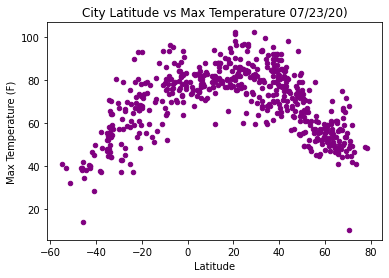

In [74]:
city_data_new.plot(kind='scatter', x='Latitude', y='Max Temperature', c='purple')
plt.title('City Latitude vs Max Temperature {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Images/LatitudeVsTemperature.png')


For late July, highest temperature is around 20 latitude of the equator. Temperatures are higher at latitudes closer to the equator and lower further away.

## Latitude vs. Humidity Plot

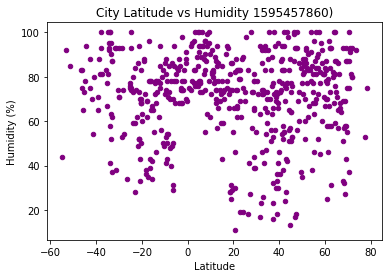

In [34]:
city_data_new.plot(kind='scatter', x='Latitude', y='Humidity', c='purple')
plt.title('City Latitude vs Humidity {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Images/LatitudeVsHumidity.png')

There doesn't seem to be a correlation between humidity and latitude. More cities seem to clustered around humidity of above 70.

## Latitude vs. Cloudiness Plot

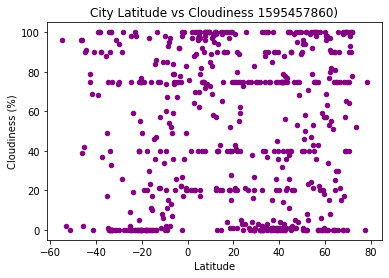

In [35]:
city_data_new.plot(kind='scatter', x='Latitude', y='Cloudiness', c='purple')
plt.title('City Latitude vs Cloudiness {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/LatitudeVsCloudiness.png')

No correlation between Latitude and Cloudiness.  There seems to be a collection of points
across all the latitudes at 0%,75%, 100% cloudiness.

## Latitude vs. Wind Speed Plot

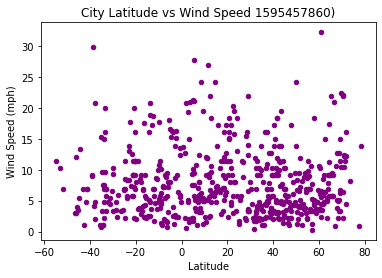

In [36]:
city_data_new.plot(kind='scatter', x='Latitude', y='Wind Speed', c='purple')
plt.title('City Latitude vs Wind Speed {})'.format(city_date))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/LatitudeVsWind Speed.png')

No correlation between Latitude and Wind Speed. Wind speed data is widely spread acroos all the latitudes.  The popular wind speed is between 0-10 mph.

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots
#Linear regression equation Y = a + bX
def linear_regression_plot(df,title_name,y_column_name,y_label,file_name,xy):
    x_values = df['Latitude']
    y_values = df[y_column_name]
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regression_values = x_values * slope + intercept
    line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values,'r-')
    plt.annotate(line_equation,xy,fontsize=15,color='red')
    plt.xlabel('Latiude')
    plt.ylabel(y_label)  
    plt.title(title_name)
    
    print(f'The r-squared is: {rvalue}')
    plt.savefig(file_name)

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] >= 0]
southern_hemisphere_df = city_data_new.loc[city_data_new['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6884540643161745


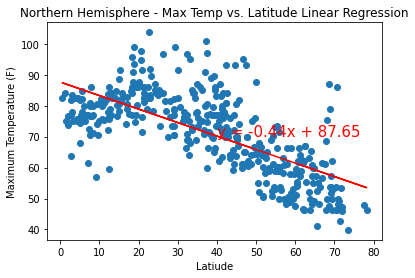

In [49]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_northern.png',
                       (40,70))

There is a strong negative linear relationship between decreasing latitude and decreasing max temperature for the Northern Hemisphere.  The r-squared value is -0.69, which means the linear equation of the line explains 69% of the variance seen.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7642148515713598


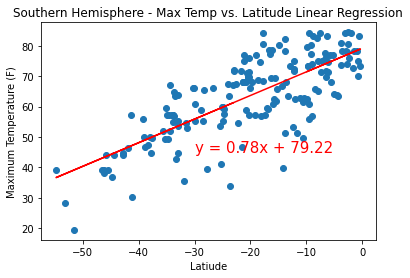

In [48]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temperature',
                       'Maximum Temperature (F)',
                       'Images/MaxTempVsLatLinRegress_southern.png',
                       (-30,45))

There is a strong positive linear relationship between temperature and latitude in the Southern Hemisphere.  The r-squared value is -0.76, which means the linear equation of the line explains 76% of the variance seen.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07166104724257868


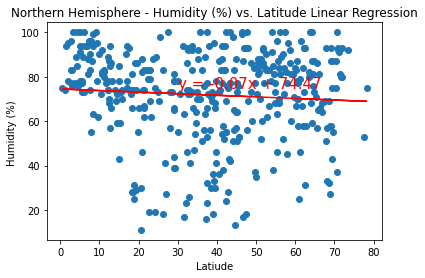

In [75]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%) ',
                       'Images/HumidityVsLatLinRegress_northern.png',
                       (30,75))

There is a weak negative linear relationship between humidity and latitude in the Northern Hemisphere.  The r-squared value is -0.07, which means the linear equation of the line explains only 7% of the variance seen.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.13388621208615217


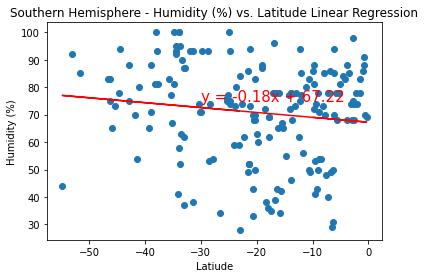

In [42]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',
                       'Humidity',
                       'Humidity (%)',
                       'Images/HumidityVsLatLinRegress_southern.png',
                       (-30,75))

There is also a negative weak relationship between humidity and latitude in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.09601024342033994


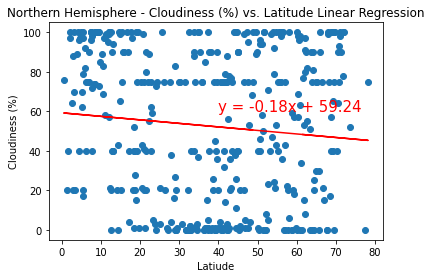

In [43]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_Northern.png',
                       (40,60))

There is a weak correlation between cloudines and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04219360597787313


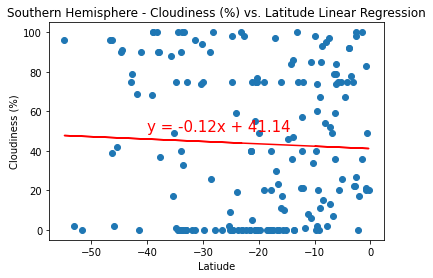

In [76]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',
                       'Cloudiness',
                       'Cloudiness (%)',
                       'Images/CloudinessVsLatLinearRegress_southern.png',
                       (-40,50))

There is a weak correlation between cloudines and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08041867563297757


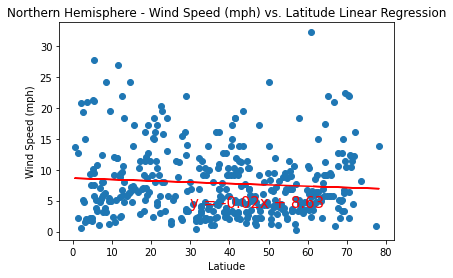

In [45]:
linear_regression_plot(northern_hemisphere_df,
                       'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_northern.png',
                       (30,4))

There is a weak correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026590954308346685


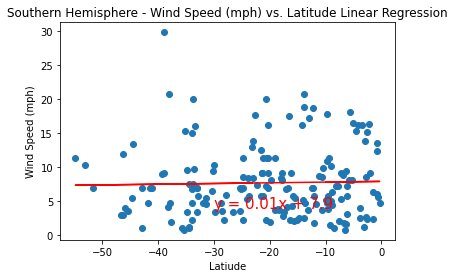

In [46]:
linear_regression_plot(southern_hemisphere_df,
                       'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',
                       'Wind Speed',
                       'Wind Speed (mph)',
                       'Images/WindSpeedVsLinRegress_southern.png',
                       (-30,4))

There is a weak correlation between wind speed and latitude in the Southern Hemisphere.